# Summary Documentation
Importing all required packages
Reading csv file
Checking the info of dataframe
Checking the null values and datatype of each column

Converting sr-score to int data type

Converting recent_funding_date_timestamp_dt from object data type to timestamp datatype and adding a column 'Year'

Barplot to show amount of funding per startup
ChatBot FlipSnack and Tailwind have got the most funding

Barplot to show mean Funding Amount per Round 
Series D had the highest mean funding

Countplot to show number of occurences of each round
Seed Round is the most frequent round in the dataset

Scatter plot to show relationship between rank and sr-score 
The higher the rank, the lower the sr-score

Countplot to show most recent year of funding
This shows the most frequent recent year of funding which is 2015

Line chart to show maximum funding by year
2015 and 2017 had the most funding amount

# Importing all required packages

In [14]:
import pandas as pd
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for data visualization
import plotly.express as px
import plotly.graph_objs as go

# EDA

Load Dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/OmdenaAI/omdena-pennsylvania-startup/main/src/tasks/task-2-data-cleaning/cleaned-datasets/300_startup_cleaned_data.csv?token=AJ7LPDXBSVX4WBLRKMUK2B3A5U22U')
df.head()

,rank,name,sr-score,description,round,amount,recent_funding_date_timestamp_dt
0,2,Giphy,"91,822",Search and make GIFs - Animated GIF search. Th...,Series D,72000000.0,2016-10-31
1,3,Buffer,"91,361",A Smarter Way to Share on Social Media - Buffe...,Series A,3500000.0,2014-10-27
2,6,PicsArt,"90,695",PicsArt is a leading image editing app and cre...,Series B,20000000.0,2016-04-20
3,8,Coursera,"90,391",Free Online Courses From Top Universities - Co...,Series D,64000000.0,2017-06-07
4,9,IFTTT,"90,168",Do more with the services you love - IFTTT (if...,Series B,30000000.0,2014-08-29


In [14]:
df.describe()

,rank,amount
count,300.000000,3.000000e+02
mean,472.763333,1.533679e+07
std,275.398721,4.863712e+07
min,2.000000,2.500000e+04
25%,249.000000,3.000000e+06
50%,485.500000,1.024730e+07
75%,709.250000,1.024730e+07
max,951.000000,5.020000e+08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              300 non-null    int64  
 1   name                              300 non-null    object 
 2   sr-score                          300 non-null    object 
 3   description                       300 non-null    object 
 4   round                             300 non-null    object 
 5   amount                            300 non-null    float64
 6   recent_funding_date_timestamp_dt  300 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 16.5+ KB


Converting sr-score to int data type


In [81]:
i=0
while i < 300:
   
   df['sr-score'][i] =  int( str(df['sr-score'][i]) .replace(',', ''))
   i+=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Converting recent_funding_date_timestamp_dt from object data type to timestamp datatype and adding a column 'Year'

In [9]:
# Add columns with year, month, and weekday name
df.recent_funding_date_timestamp_dt = pd.to_datetime(df.recent_funding_date_timestamp_dt)
df['Year'] = df.recent_funding_date_timestamp_dt.dt.year
df

,rank,name,sr-score,description,round,amount,recent_funding_date_timestamp_dt,Year
0,2,Giphy,"91,822",Search and make GIFs - Animated GIF search. Th...,Series D,72000000.00,2016-10-31,2016
1,3,Buffer,"91,361",A Smarter Way to Share on Social Media - Buffe...,Series A,3500000.00,2014-10-27,2014
2,6,PicsArt,"90,695",PicsArt is a leading image editing app and cre...,Series B,20000000.00,2016-04-20,2016
3,8,Coursera,"90,391",Free Online Courses From Top Universities - Co...,Series D,64000000.00,2017-06-07,2017
4,9,IFTTT,"90,168",Do more with the services you love - IFTTT (if...,Series B,30000000.00,2014-08-29,2014
...,...,...,...,...,...,...,...,...
295,941,RebelsMarket,"74,690",World's #1 Counterculture Megastore - RebelsMa...,Seed,10247296.46,2015-04-01,2015
296,945,CIENCE,"74,659",Sales Conversations Start Here - CIENCE is hum...,Seed,10247296.46,2015-04-01,2015
297,946,talkroute,"74,642",Turn any phone into a professional sounding ph...,Venture,500000.00,2015-04-24,2015
298,950,GitMind,"74,590",Make your ideas happen - GitMind is a free onl...,Seed,10247296.46,2015-04-01,2015



# Visualisations

Barplot to show amount of funding per startup

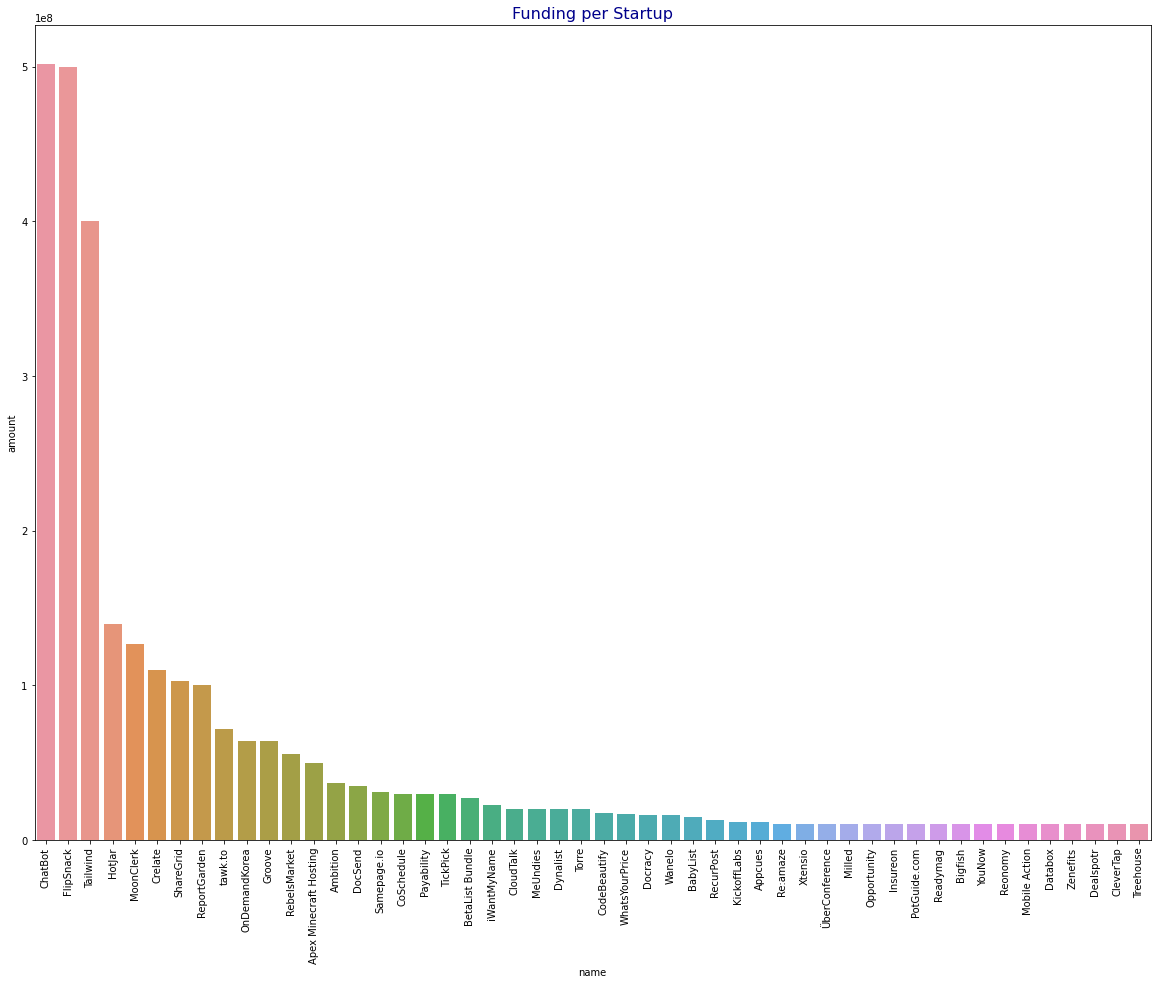

In [28]:
df2 = pd.DataFrame(columns = ['name'])
df2["name"]=[each for each in df['name'].unique()]
df2["amount"]=df['amount']
df2=df2.sort_values(by=['amount'],ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x=df2.name.head(50), y=df2.amount.head(50))
plt.xticks(rotation= 90)
plt.xlabel('name')
plt.ylabel('amount')
plt.title('Funding per Startup',fontsize=16,color='DarkBlue')
plt.show()

Barplot to show mean Funding Amount per Round 

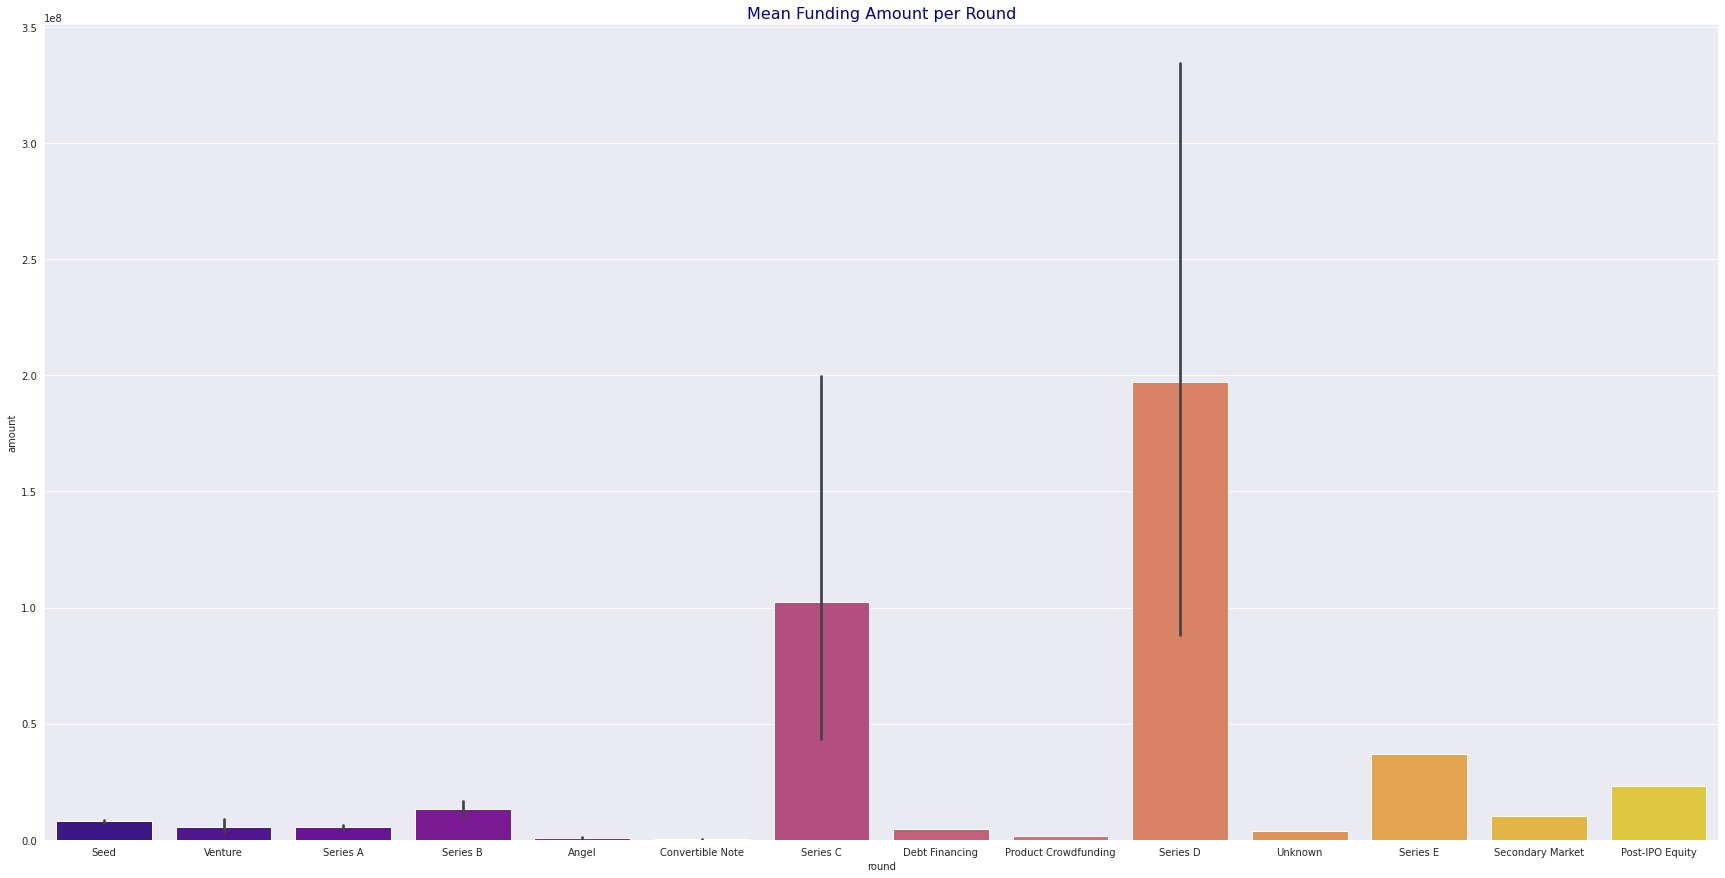

In [30]:
# set the backgroud style of the plot
sns.set_style('darkgrid')
plt.figure(figsize=(30,15))
# plot the graph using the default estimator mean
sns.barplot(x ='round', y ='amount', data = df, palette ='plasma')
plt.title('Mean Funding Amount per Round',fontsize=16,color='DarkBlue')
plt.show()

Countplot to show number of occurences of each round

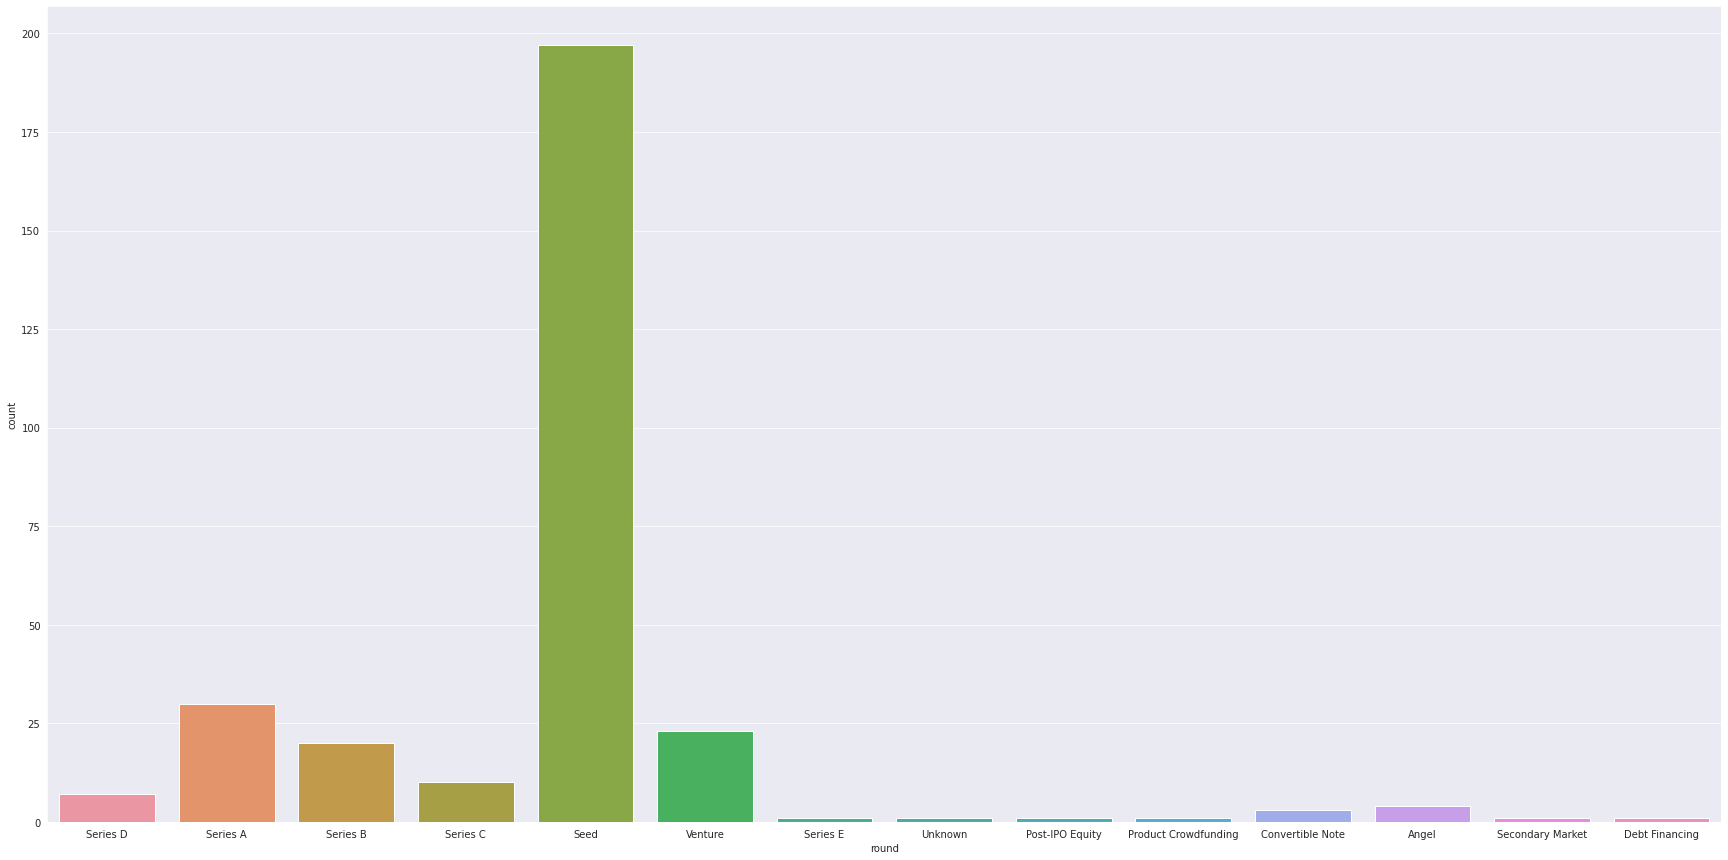

In [87]:
plt.figure(figsize=(30,15))
sns.countplot(x ='round', data = df)


Scatter plot to show relationship between rank and sr-score 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



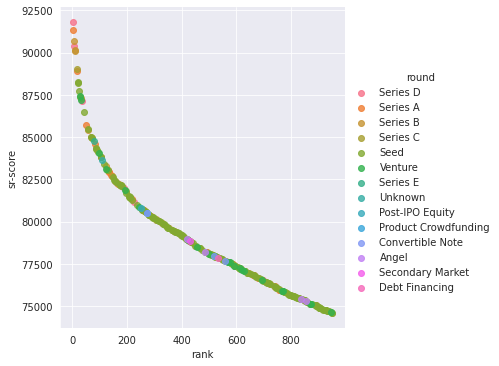

In [96]:

sns.lmplot(
    "rank", "sr-score", data=df, hue="round", fit_reg=False
);

Countplot to show most recent year of funding

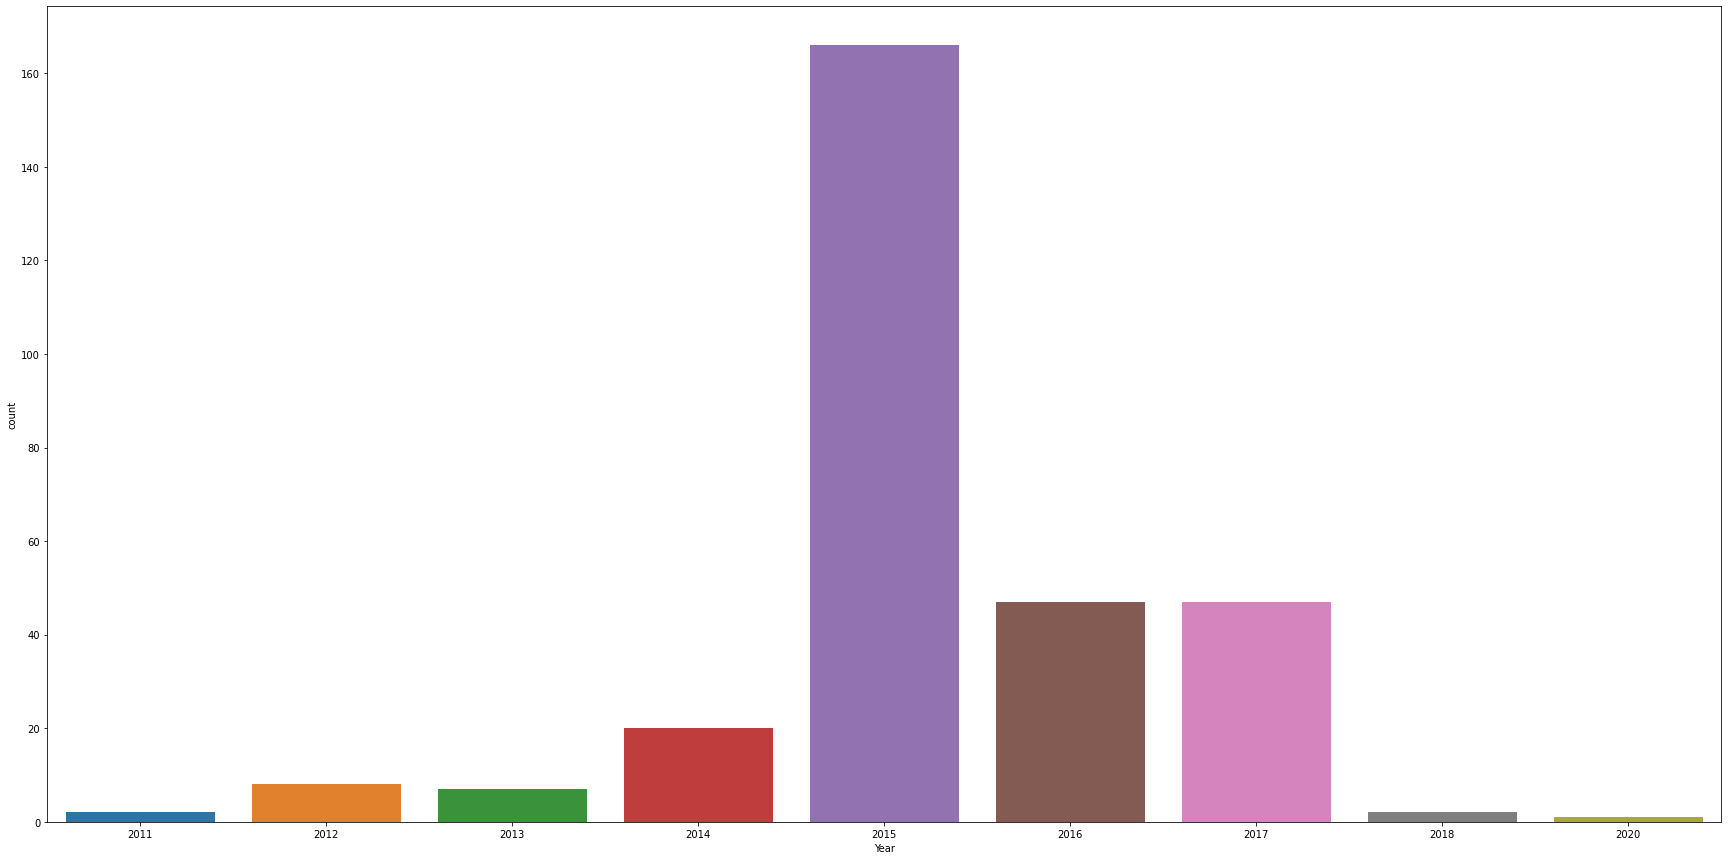

In [12]:
plt.figure(figsize=(30,15))
sns.countplot(x ='Year', data = df)

Line chart to show maximum funding by year

In [31]:
df = df.sort_values(by=['recent_funding_date_timestamp_dt'])
df
fig = go.Figure(data=go.Scatter(x=df['Year'].astype(dtype=str), 
                        y=df['amount'],
                        marker_color='indianred', text="counts"))
fig.update_layout({"title": 'Highest funding amount by year',
                   "xaxis": {"title":"Year"},
                   "yaxis": {"title":"Funding"},
                   "showlegend": False})

fig.show()